In [47]:
!pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [145]:
crab=pd.read_csv("crabs.csv")
crab.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,M,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0
1,1,I,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0
2,2,F,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0
3,3,I,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0
4,4,I,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0


In [3]:
crab.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [4]:
# Length, height and Diameter are all measured in feet
# All weights are in ounces
# Age is the number of months alive

In [5]:
crab.isna().sum().sort_values(ascending=False)

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [6]:
crab.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,99999.500000,1.312448,1.020320,0.346028,23.123436,9.989370,4.993181,6.634229,9.950615
std,57735.171256,0.289833,0.238723,0.091179,12.597823,5.604343,2.785712,3.556733,3.217088
min,0.000000,0.000000,0.000000,0.000000,0.028349,0.014175,0.014175,0.042524,1.000000
25%,49999.750000,1.150000,0.875000,0.287500,13.154168,5.669900,2.792426,3.827183,8.000000
50%,99999.500000,1.375000,1.075000,0.362500,23.515910,9.851451,4.890289,6.803880,10.000000
75%,149999.250000,1.525000,1.200000,0.412500,32.063285,13.933779,6.959802,9.029316,11.000000
max,199999.000000,7.583491,2.250000,2.825000,80.101512,45.274152,26.124064,37.038622,29.000000


In [7]:
# viscera weight is the weight of the crabs organs
# This dataset was made so that we could use it to predict the age of a crab

In [8]:
crab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              200000 non-null  int64  
 1   Sex             200000 non-null  object 
 2   Length          200000 non-null  float64
 3   Diameter        200000 non-null  float64
 4   Height          200000 non-null  float64
 5   Weight          200000 non-null  float64
 6   Shucked Weight  200000 non-null  float64
 7   Viscera Weight  200000 non-null  float64
 8   Shell Weight    200000 non-null  float64
 9   Age             200000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 15.3+ MB


In [9]:
# Does the age actually affect the weight?

In [21]:
corr=crab[["Age","Weight",'Shucked Weight',"Viscera Weight","Shell Weight","Length","Diameter","Height"]].corr()

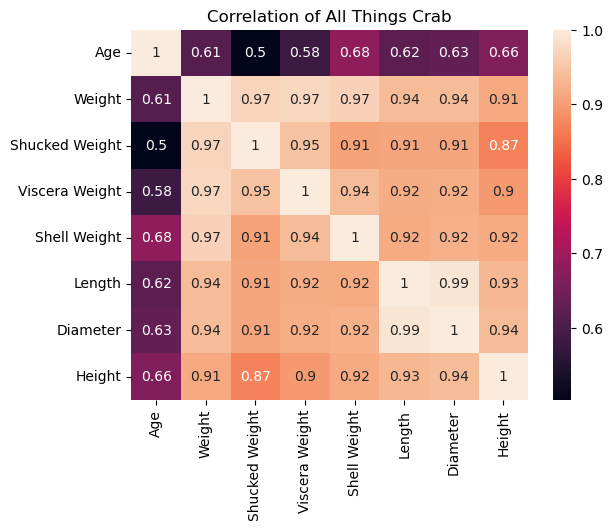

In [22]:
sns.heatmap(corr,annot=True)
plt.title("Correlation of All Things Crab")
plt.show()

What is being shown here tells us that most of these measurements have a strong positive correlation with each other. Oddly enough, our only outlier is the age. Perhaps this can be solved with a delve into the different genders?

In [28]:
# Does the sex of the crab impact its' weight?
crab['Sex'].value_counts()

M        72270
I        66632
F        61097
0.025        1
Name: Sex, dtype: int64

In [146]:
#Need to delete the '0,025' row as it doesn't make logical sense
crab.loc[crab['Sex'] == '0.025']

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
125049,125049,0.025,0.3875,0.2625,0.15,0.411068,0.141747,0.099223,0.141747,4.0


In [147]:
crab=crab.drop([125049])

In [148]:
#checking to make sure the row was properly dropped
crab['Sex'].value_counts()

M    72270
I    66632
F    61097
Name: Sex, dtype: int64

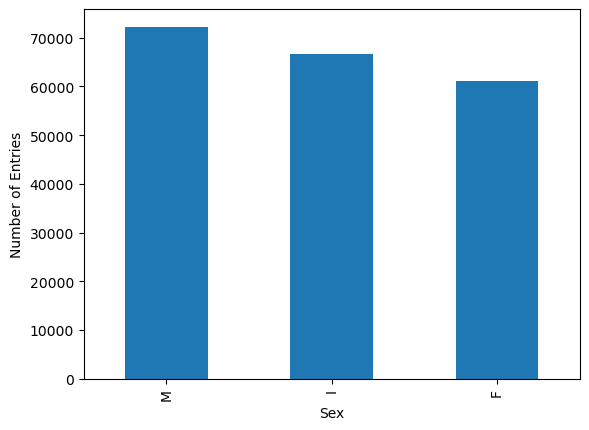

In [149]:
crab['Sex'].value_counts().plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Number of Entries")
plt.show()

In [ ]:
# M= Male, F= Female, I= either unknown or neither

The amount of values seem even enough to do a valid comparison per each 'Sex' type.

In [37]:
male=crab.loc[(crab.Sex=="M")]
male.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,M,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0
6,6,M,1.5250,1.1875,0.4375,31.581343,11.382324,7.980384,9.213587,14.0
7,7,M,1.6250,1.2875,0.4375,42.212406,17.704263,8.660772,11.339800,13.0
8,8,M,1.3375,1.0500,0.3875,23.090668,12.048538,4.379998,6.038443,9.0
10,10,M,1.6000,1.2500,0.4250,35.989690,16.201739,8.547374,9.497082,10.0


In [38]:
fem=crab.loc[(crab.Sex=="F")]
fem.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
2,2,F,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0
5,5,F,1.4875,1.1875,0.4000,28.335325,12.048538,7.668540,8.504850,10.0
9,9,F,1.3375,1.0125,0.3375,18.313777,8.944267,4.195726,5.953395,10.0
12,12,F,1.4500,1.0750,0.3250,20.638436,9.837276,3.841357,6.236890,9.0
14,14,F,1.6250,1.2750,0.4750,33.594158,14.033003,7.257472,9.355335,14.0


In [39]:
idk=crab.loc[(crab.Sex=="I")]
idk.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
1,1,I,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0
3,3,I,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0
4,4,I,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0
11,11,I,0.4625,0.3375,0.1125,0.907184,0.297670,0.184272,0.184272,6.0
13,13,I,1.1000,0.8500,0.2500,11.736693,5.953395,2.267960,2.693202,7.0


In [72]:
male.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,72270.000000,72270.000000,72270.000000,72270.000000,72270.000000,72270.000000,72270.000000,72270.000000,72270.000000
mean,100170.497924,1.434381,1.121571,0.383179,28.230421,12.226468,6.100625,8.038998,10.935298
std,57795.002026,0.198066,0.163216,0.066063,10.450431,4.878001,2.332736,2.912682,2.890947
min,0.000000,0.287500,0.000000,0.000000,0.411068,0.127573,0.077525,0.085048,1.000000
25%,50203.250000,1.325000,1.037500,0.350000,21.729892,8.873394,4.535920,6.236890,9.000000
50%,100241.000000,1.462500,1.150000,0.387500,28.207753,12.105237,6.095142,8.079607,10.000000
75%,150340.500000,1.562500,1.225000,0.425000,34.628914,15.152808,7.526792,9.780577,12.000000
max,199997.000000,2.800000,2.250000,0.700000,80.101512,45.274152,26.124064,37.038622,29.000000


In [73]:
fem.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,61097.000000,61097.000000,61097.00000,61097.000000,61097.000000,61097.000000,61097.000000,61097.000000,61097.000000
mean,100142.261911,1.469736,1.15103,0.396086,30.006075,12.804239,6.518945,8.609482,11.446683
std,57692.842401,0.173673,0.14183,0.060568,10.107934,4.663906,2.272261,2.863497,3.005687
min,2.000000,0.412500,0.27500,0.000000,0.496116,0.141747,0.099223,0.141747,3.000000
25%,50219.000000,1.375000,1.06250,0.362500,23.459211,9.610480,4.890289,6.803880,9.000000
50%,100298.000000,1.500000,1.17500,0.400000,29.993771,12.714751,6.406987,8.504850,11.000000
75%,149884.000000,1.587500,1.25000,0.437500,36.429108,15.663099,8.022908,10.234170,13.000000
max,199999.000000,7.583491,1.70000,2.267960,80.101512,42.354153,25.273579,28.491248,29.000000


In [74]:
idk.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,66632.000000,66632.000000,66632.000000,66632.000000,66632.000000,66632.000000,66632.000000,66632.000000,66632.000000
mean,99682.754382,1.035990,0.790662,0.259836,11.273760,4.982088,2.393084,3.299522,7.510911
std,57708.949508,0.258232,0.210193,0.075048,7.216835,3.279375,1.559086,2.100501,2.158758
min,1.000000,0.000000,0.000000,0.000000,0.028349,0.014175,0.014175,0.042524,1.000000
25%,49566.750000,0.875000,0.662500,0.212500,5.584852,2.381358,1.148155,1.700970,6.000000
50%,99511.000000,1.062500,0.812500,0.262500,10.333393,4.507570,2.126212,2.976698,7.000000
75%,149766.000000,1.225000,0.950000,0.312500,15.875720,7.059025,3.373591,4.677668,8.000000
max,199998.000000,2.000000,2.087500,2.825000,71.114721,33.920177,16.300963,20.553387,29.000000


In [75]:
# Male crabs have an average weight of 28.23 while Female crabs have an average weight of 30
# The crabs who have no labeled sex have an average weight of 11.27

In [79]:
corrf=fem[["Age","Weight",'Shucked Weight',"Viscera Weight","Shell Weight","Length","Diameter","Height"]].corr()
corrm=male[["Age","Weight",'Shucked Weight',"Viscera Weight","Shell Weight","Length","Diameter","Height"]].corr()
corri=idk[["Age","Weight",'Shucked Weight',"Viscera Weight","Shell Weight","Length","Diameter","Height"]].corr()

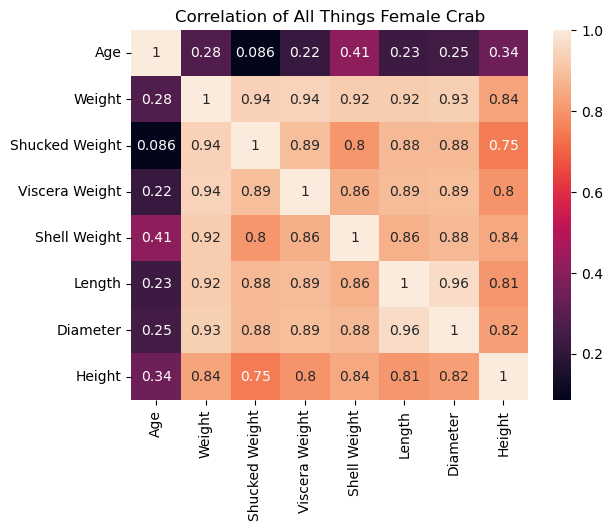

In [77]:
sns.heatmap(corrf,annot=True)
plt.title("Correlation of All Things Female Crab")
plt.show()

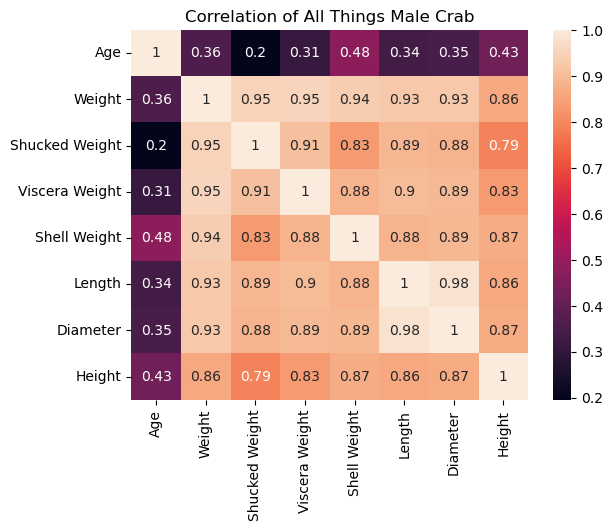

In [80]:
sns.heatmap(corrm,annot=True)
plt.title("Correlation of All Things Male Crab")
plt.show()

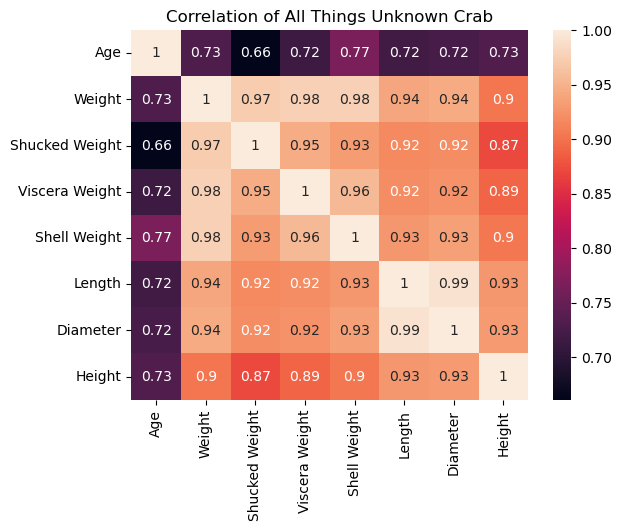

In [81]:
sns.heatmap(corri,annot=True)
plt.title("Correlation of All Things Unknown Crab")
plt.show()

The conclusion we can draw from this is that the crabs who have no sex tend to be the smallest crabs in weight, therefore in everything else due to the 95% positive correlation. So, we can safely conclude as well that female crabs will tend to be the heaviest, and therefore be deemed the best. 

Furthermore, we also see through the final correlation charts that the male and female crabs' weight is very lowly correlated with their age while the immature crabs are highly correlated. Well, it's just that, crabs don't have a sex until they are fully matured. So, having a chart that shows that growth makes a ton of sense, and that's exactly the result I see.

Overall, the crabs only seem to reach their full weight when they have grown mature. So, it's recommended that they choose adult crabs for the best results.

In [82]:
#Onto machine learning!
#First things first, deleting the 'id' and turning the 'sex' column numeric!

In [150]:
crab.drop(['id'], axis=1, inplace=True)
crab.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,M,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0
1,I,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0
2,F,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0
3,I,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0
4,I,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0


In [151]:
crab.sample(10)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
103,I,0.7375,0.5625,0.2125,3.968930,1.417475,0.637864,1.190679,5.0
134557,M,0.8500,0.6250,0.2125,6.917278,3.047571,1.700970,1.984465,6.0
36205,M,1.0000,0.8000,0.2500,8.462326,3.401940,1.800193,2.976698,7.0
9348,F,1.3750,1.0375,0.3750,23.260765,10.985431,5.556502,7.824462,10.0
91196,F,1.4125,1.1125,0.4250,24.848337,12.771450,4.550095,6.520385,8.0
166014,M,1.3625,1.0125,0.4000,27.187171,13.536886,5.939220,7.229122,11.0
9014,I,1.4000,1.1250,0.3125,24.919210,10.574364,5.754949,7.172423,8.0
167833,M,1.2625,0.9875,0.3375,15.351254,7.526792,3.671260,4.677668,8.0
114979,F,1.0875,0.8125,0.3125,11.708343,5.117085,2.820775,4.819415,11.0
32487,M,1.4125,1.1250,0.3875,27.640763,10.149121,4.762716,8.930093,13.0


In [162]:
x=crab.drop("Age",axis=1)
y=crab[['Age']]

In [163]:
x.sample()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
156071,I,1.225,0.95,0.3625,16.924651,6.704657,3.288542,5.244657


In [164]:
x=pd.get_dummies(x,drop_first=True)

In [165]:
x.sample()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
199892,1.6,1.2625,0.375,34.55804,15.989118,10.857859,8.646598,0,0


In [166]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.15,random_state=20)

In [167]:
from sklearn.linear_model import LogisticRegression
classifi=LogisticRegression()
classifi.fit(x_train.values,y_train.values.ravel())

LogisticRegression()

In [168]:
x.sample()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
80405,1.375,1.0875,0.35,20.879407,9.142714,3.997279,6.23689,0,1


In [170]:
print(classifi.predict([[1.375,1.0875,0.35,20.879407,9.142714,3.997279,6.23689,0,1]]))

[9.]


In [172]:
crab.iloc[80405]

Sex                       M
Length                1.375
Diameter             1.0875
Height                 0.35
Weight            20.879407
Shucked Weight     9.142714
Viscera Weight     3.997279
Shell Weight        6.23689
Age                     9.0
Name: 80405, dtype: object

In [173]:
y_pred=classifi.predict(x_test.values)

In [174]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[   0    0    0    0    0    8    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    5    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0   99    9    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  434    2    2    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  743   78   15    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  745  967  156   33    1    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  355 1389  677  253   13    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0  

In [175]:
print(classifi.classes_)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 29.]


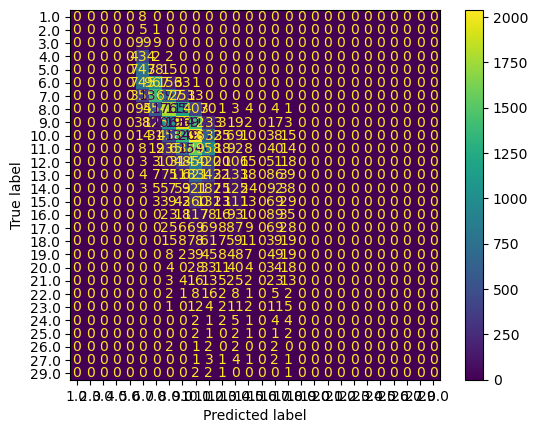

<Figure size 3000x480 with 0 Axes>

In [189]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifi.classes_)
disp.plot()
plt.figure().set_figwidth(30)
plt.show()

In [177]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         8
         2.0       0.00      0.00      0.00         6
         3.0       0.00      0.00      0.00       108
         4.0       0.00      0.00      0.00       438
         5.0       0.00      0.00      0.00       836
         6.0       0.29      0.39      0.33      1902
         7.0       0.44      0.52      0.47      2687
         8.0       0.37      0.44      0.40      4043
         9.0       0.33      0.40      0.36      4885
        10.0       0.26      0.44      0.33      4679
        11.0       0.29      0.27      0.28      3576
        12.0       0.10      0.01      0.02      1904
        13.0       0.13      0.09      0.11      1475
        14.0       0.17      0.03      0.04       936
        15.0       0.00      0.00      0.00       721
        16.0       0.12      0.19      0.15       479
        17.0       0.09      0.08      0.08       370
        18.0       0.00    

[[    0     0   335  9503     1    61    18     8    95]
 [    0     0    77 14754    14  5001    52     0    81]
 [    0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0]]


ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (28).

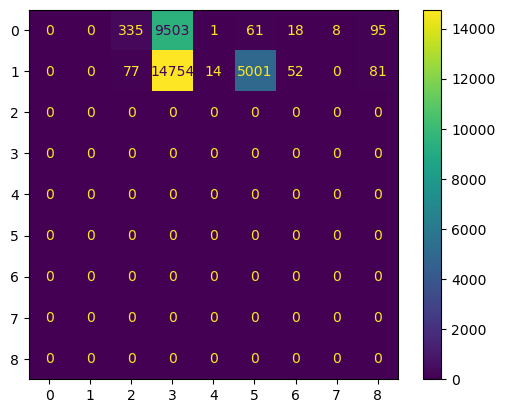

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         8
         2.0       0.00      0.00      0.00         6
         3.0       0.00      0.00      0.00       108
         4.0       0.00      0.00      0.00       438
         5.0       0.00      0.00      0.00       836
         6.0       0.20      0.18      0.19      1902
         7.0       0.36      0.49      0.41      2687
         8.0       0.39      0.48      0.43      4043
         9.0       0.33      0.44      0.37      4885
        10.0       0.25      0.38      0.30      4679
        11.0       0.28      0.30      0.29      3576
        12.0       0.00      0.00      0.00      1904
        13.0       0.13      0.08      0.10      1475
        14.0       0.13      0.01      0.02       936
        15.0       0.07      0.00      0.00       721
        16.0       0.12      0.25      0.16       479
        17.0       0.14      0.01      0.02       370
        18.0       0.00    